In [4]:
# define a function which display the image read by cv2 using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

def show_image(image = None, title = "", size = 10):
    if image is not None:
        height, width = image.shape[0], image.shape[1]
        aspect_ratio = width / height
        plt.figure(figsize=(size * aspect_ratio, size))
        rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgb_image)
        plt.title(title)
        plt.show()
    else:
        print("Image is null")

### Image Translation 
- Image translation is nothing but shifting the image on x and y axis.


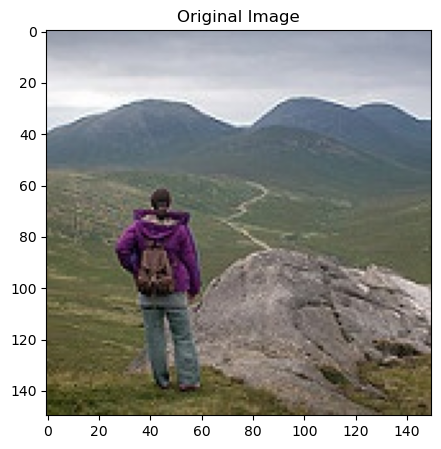

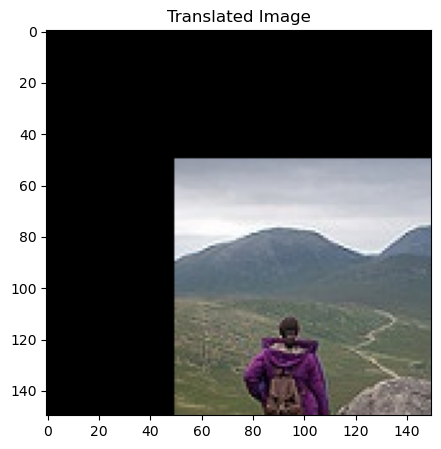

In [5]:
# use warpAffine(image, TranslationMatrix, (width,height)) to translate the image horizantally and vartically.
# the Translation Matrix T looks like

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# where Tx represent by how much pixels you are shifting your image on x axis. i.e horizontally,
# similarly, Ty represent by how much pixels you are shifting the image on y axis. i.e vertically.

path = "images/328.jpg"
img = cv2.imread(path)

show_image(img, "Original Image", 5)

height, width = img.shape[:2]
T = np.float32([[1,0,50],[0,1,50]])

# the translation matrix T says that shift the image by 50 pixels on x and y axis.

translated_image = cv2.warpAffine(img, T, (width,height))
show_image(translated_image, "Translated Image", 5)


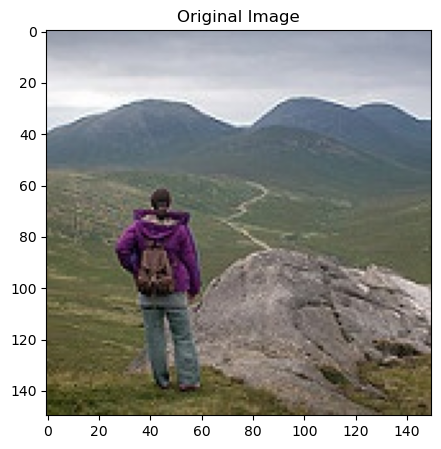

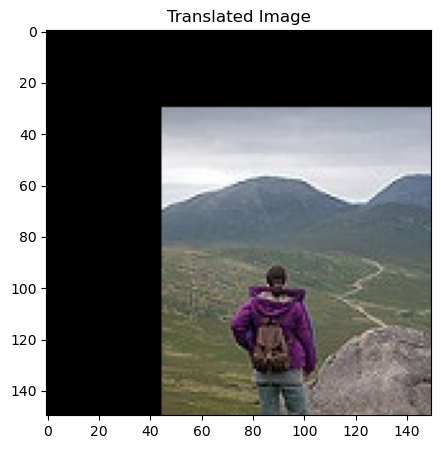

shifting image on X axis by 45.0 Pixels and Y axis by 30.0


In [6]:
# Let's translate the image by pertange i.e 30% horizontally, and 20% vertically
path = "images/328.jpg"
img = cv2.imread(path)

show_image(img, "Original Image", 5)

height, width = img.shape[:2]

translate_x = width * 0.3
translate_y = height * 0.2

T = np.float32([[1,0,translate_x],[0,1,translate_y]])

# the translation matrix T says that shift the image by 50 pixels on x and y axis.

translated_image = cv2.warpAffine(img, T, (width,height))
show_image(translated_image, "Translated Image", 5)

print("shifting image on X axis by {0} Pixels and Y axis by {1}".format(translate_x,translate_y))

### Image Rotation

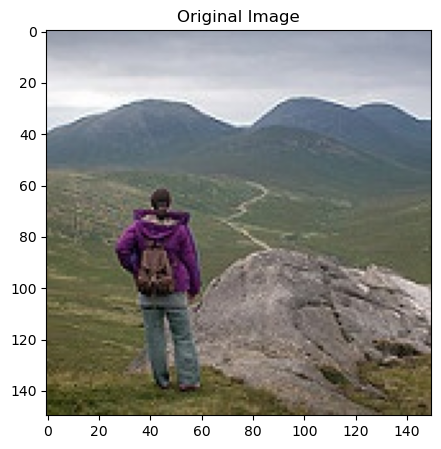

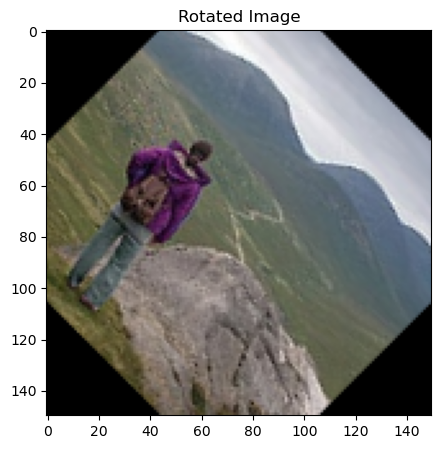

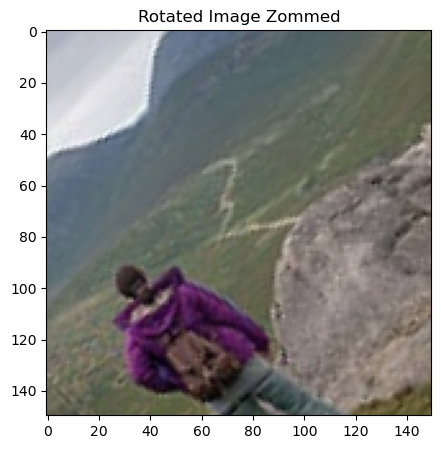

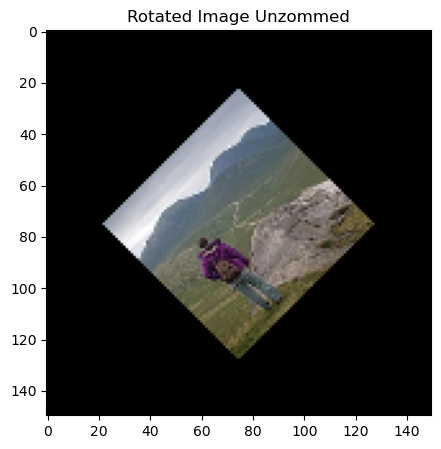

In [7]:
# use cv2.getRotationMatrix2D((rotation_center_x, rotation_center_y), rotation_angle, scale) # rotation angle can be -ve
path = "images/328.jpg"
img = cv2.imread(path)

show_image(img, "Original Image", 5)
height, width = img.shape[:2]

center_x,center_y = width/2, height/2

rotation_matrix = cv2.getRotationMatrix2D((center_x,center_y), -45, 1) # scale = 1 means preserve the original image scale
rotation_matrix_zoomed = cv2.getRotationMatrix2D((center_x,center_y), 45, 1.5)
rotation_matrix_unzoomed = cv2.getRotationMatrix2D((center_x,center_y), 45, 0.5)

rotated_image = cv2.warpAffine(img, rotation_matrix, (width,height))
show_image(rotated_image, "Rotated Image", 5)

rotated_image_zommed = cv2.warpAffine(img, rotation_matrix_zoomed, (width,height))
show_image(rotated_image_zommed, "Rotated Image Zommed", 5)

rotated_image_unzommed = cv2.warpAffine(img, rotation_matrix_unzoomed, (width,height))
show_image(rotated_image_unzommed, "Rotated Image Unzommed", 5)

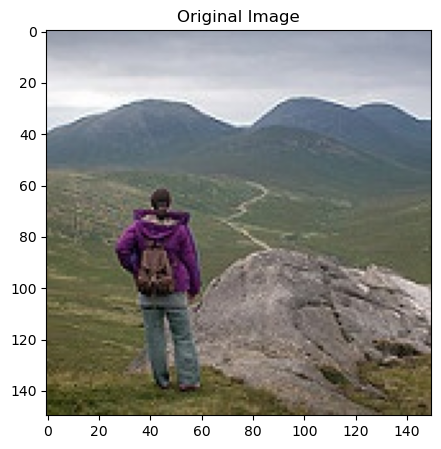

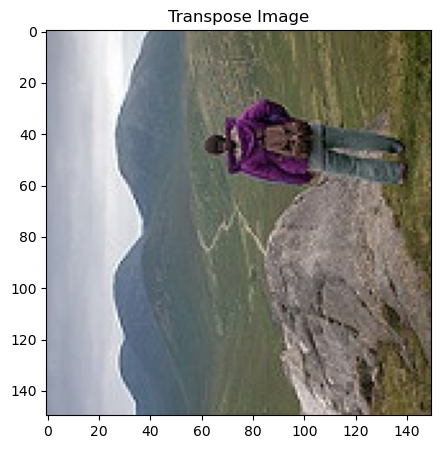

In [8]:
# use cv2.transpose(img) to rotate image, it basically flip the image and rotate by 90 deg anticlockwize
path = "images/328.jpg"
img = cv2.imread(path)

show_image(img, "Original Image", 5)

transposed_image = cv2.transpose(img)
show_image(transposed_image, "Transpose Image", 5)


### Image Flipping

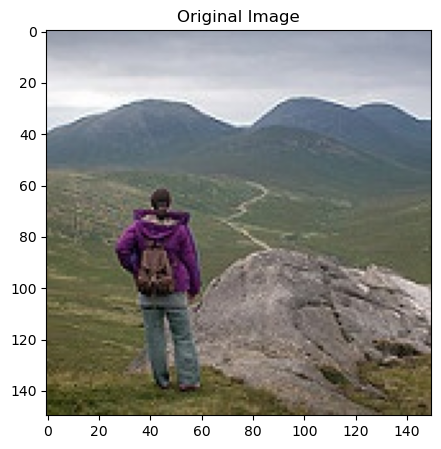

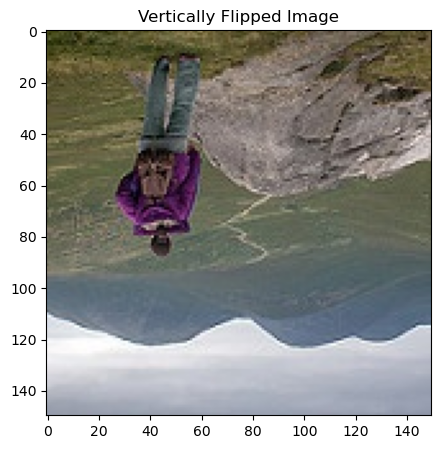

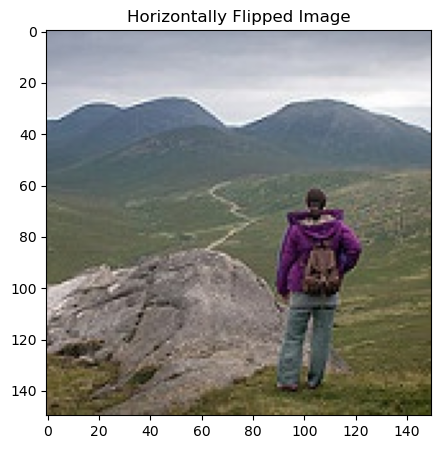

In [10]:
# use cv2.flip(img, flip_code) # flip_code 0 means vertical flip or flip on y axis, 1 means horizontal flip or flip on x axis

path = "images/328.jpg"
img = cv2.imread(path)

show_image(img, "Original Image", 5)

vertical_flipped_image = cv2.flip(img,0) 
horizontal_flipped_image = cv2.flip(img,1) 

show_image(vertical_flipped_image, "Vertically Flipped Image", 5)
show_image(horizontal_flipped_image, "Horizontally Flipped Image", 5)

### Image Resizing
- resizing an image means change the dimension of the image, wither you are upscaling the image or downscaling the image

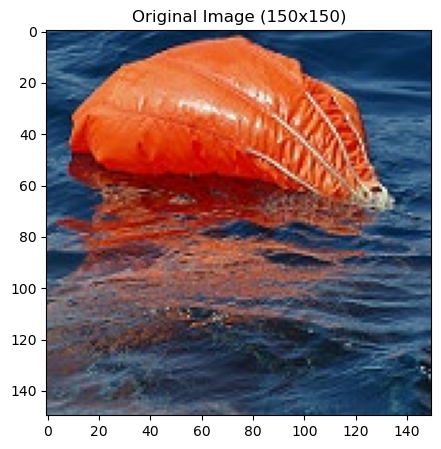

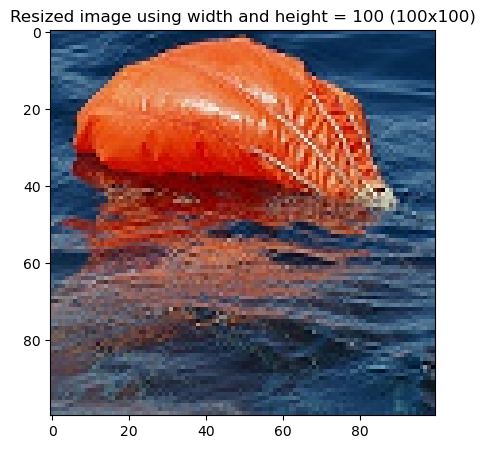

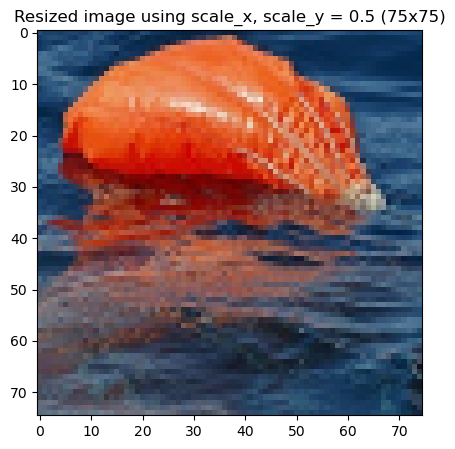

In [12]:
# use cv2.resize(img, (resize_width,resize_height), scale_x, scale_y, interpolation)
# to resize image you have to either use (resize_width, resize_height) or scale_x, scale_y, also you can combine the both

# some of the interpolation methods and their use cases

# cv2.INTER_AREA - Good for shrinking or down sampling
# cv2.INTER_NEAREST - Fastest
# cv2.INTER_LINEAR - Good for zooming or up sampling (default)
# cv2.INTER_CUBIC - Better
# cv2.INTER_LANCZOS4 - Best

path = 'images/227.jpg'
img = cv2.imread(path)
show_image(img, "Original Image ({0}x{1})".format(img.shape[0], img.shape[1]),5)

resized_img = cv2.resize(img, (100,100), interpolation = cv2.INTER_LANCZOS4)
show_image(resized_img, "Resized image using width and height = 100 ({0}x{1})".format(resized_img.shape[0], resized_img.shape[1]),5)

resized_img2 = cv2.resize(img, None,fx = 0.5, fy=0.5, interpolation = cv2.INTER_AREA)
show_image(resized_img2, "Resized image using scale_x, scale_y = 0.5 ({0}x{1})".format(resized_img2.shape[0], resized_img2.shape[1]),5)


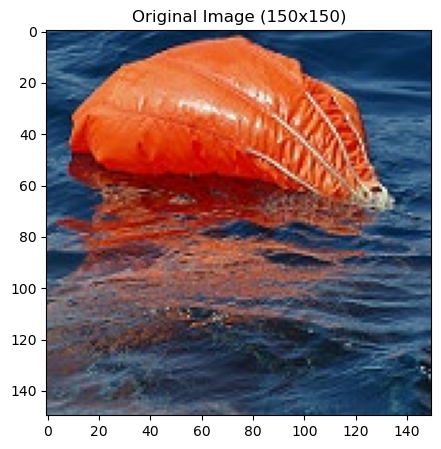

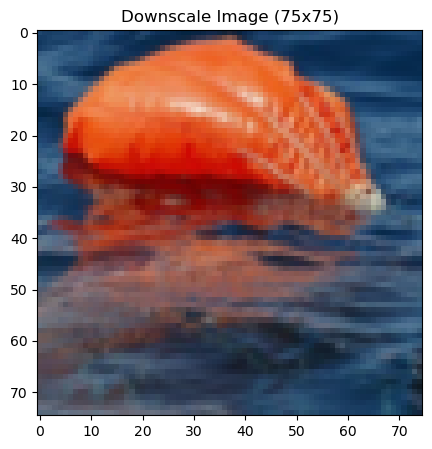

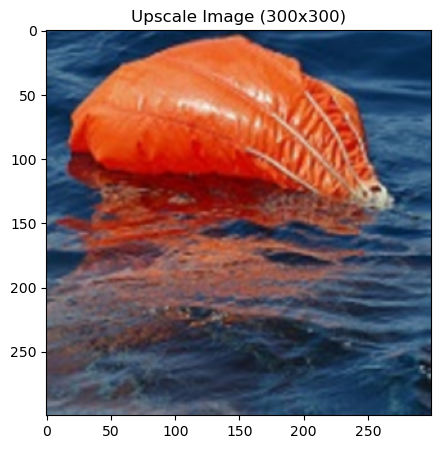

In [13]:
# use cv2.pyrUp(img) to upscale the image and cv2.pyrDown(img) to downscale the image
# by default it upscale or downscale the image by 50%

path = 'images/227.jpg'
img = cv2.imread(path)
show_image(img, "Original Image ({0}x{1})".format(img.shape[0], img.shape[1]),5)

downscale_img = cv2.pyrDown(img)
upscale_img = cv2.pyrUp(img)

show_image(downscale_img, "Downscale Image ({0}x{1})".format(downscale_img.shape[0], downscale_img.shape[1]),5)
show_image(upscale_img, "Upscale Image ({0}x{1})".format(upscale_img.shape[0], upscale_img.shape[1]),5)

### Image Cropping

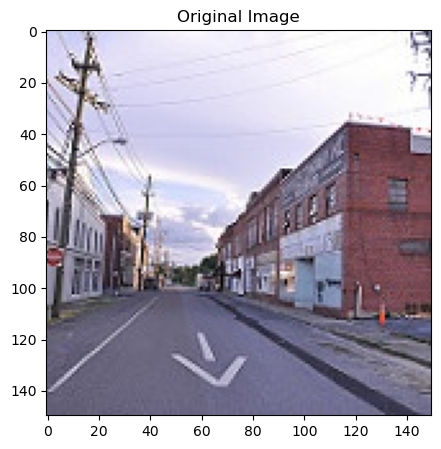

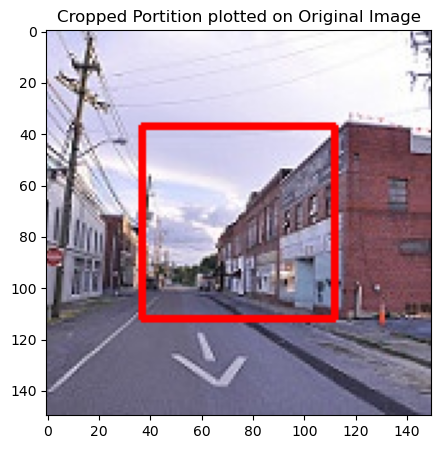

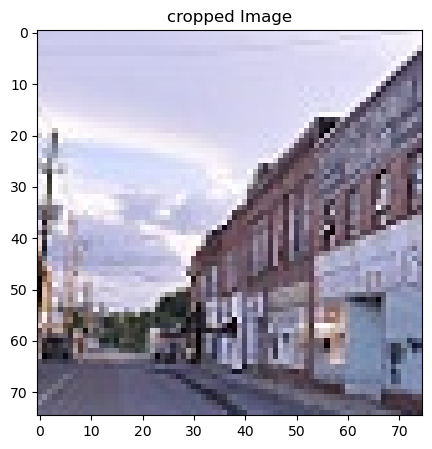

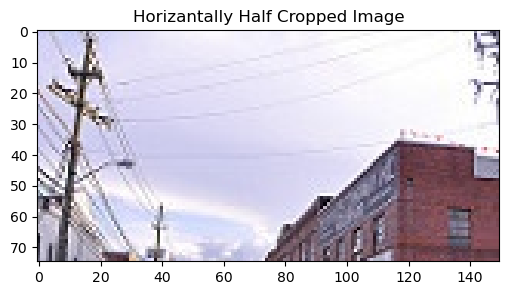

In [15]:
# There is no specific method for cropping you have to find the region of cropping and copy the image array into new one.
# to crop an image you can use img = img[start_row : end_row , start_column : end_column]

# | 0 1 2 3 4 5 6 |
# | 1 2 3 4 5 6 7 |
# | 2 3 4 5 6 7 8 |
# | 3 4 5 6 7 8 9 | 

# assume you want to crop above image and you have specified img = img[1 : 3 , 3 : 5] then it will crop the region like below

# | 3 4 5 |
# | 4 5 6 |
# | 5 6 7 |                  


path = "images/93.jpg"
img = cv2.imread(path)
show_image(img, "Original Image",5)

# let's crop the image from 25% to 75% in width and height 
height, width = img.shape[:2]

copy_img = img.copy()
cv2.rectangle(copy_img,(int(height * 0.25), int(width * 0.25)), (int(height * 0.75), int(width * 0.75)), (0,0,255), 2)
show_image(copy_img, "Cropped Portition plotted on Original Image",5)

cropped_img = img[int(height * 0.25) : int(height * 0.75), int(width * 0.25) : int(width * 0.75)]
show_image(cropped_img, "cropped Image",5)


cropped_img2 = img[0 : int(width/2), 0 : height] # just change the cropping indexes as per requirement
show_image(cropped_img2, "Horizantally Half Cropped Image",3)